In [5]:
import scipy as sp
help(sp)   #ayuda del paquete scipy,vemos que la libreria scipy tiene muchos paquetes dentro de ella

Help on package scipy:

NAME
    scipy

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at https://docs.scipy.org.
    
    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import. For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     li

In [11]:
dir(sp) #podriamos ver las funciones de este paquete,pero como esta formada por varios paquetes deberiamos ver cada paquete.
#help(sp.x) #ayuda de la funcion x de la libreria scipy

AttributeError: module 'scipy' has no attribute 'path'

¿Que es Scipy?
* Conjunto de paquetes para computación cientifica general.
* Integración,optimazación,interpolación,procesamiento de señales digitales, estadisticas...
* Normalmente interfaces a programas muy utilizados escritos en C++


In [18]:
#Antes que nada procedemos a importar otras librerias necesarias y de utilidad.
import numpy as np
import matplotlib.pyplot as plt

Integración Numerica

In [13]:
from scipy import integrate #de scipy importamos el paquete integrate
dir(integrate) #todas las funciones de este paquete

['AccuracyWarning',
 'BDF',
 'DOP853',
 'DenseOutput',
 'IntegrationWarning',
 'LSODA',
 'OdeSolution',
 'OdeSolver',
 'RK23',
 'RK45',
 'Radau',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bvp',
 '_dop',
 '_ivp',
 '_ode',
 '_odepack',
 '_quad_vec',
 '_quadpack',
 '_quadrature',
 'complex_ode',
 'cumtrapz',
 'cumulative_trapezoid',
 'dblquad',
 'fixed_quad',
 'lsoda',
 'newton_cotes',
 'nquad',
 'ode',
 'odeint',
 'odepack',
 'quad',
 'quad_explain',
 'quad_vec',
 'quadpack',
 'quadrature',
 'romb',
 'romberg',
 'simps',
 'simpson',
 'solve_bvp',
 'solve_ivp',
 'test',
 'tplquad',
 'trapezoid',
 'trapz',
 'vode']

Vamos a integrar la siguiente función $$f(x) = e^{-x^2}$$

In [21]:
# La función escrita en latex $$f(x) = e^{-x^2}$$
def f(x) :
    return np.exp(-x**2)
integrate.quad(f,0,5) #nos da el (valor de la integración,estimación del error)

(0.8862269254513955, 2.3183115139669666e-14)

$$f(x) = Ae^{-Bx^2}$$

In [24]:
def f(x,A,B) :
    return A*np.exp(-B*x**2)
integrate.quad(f,0,5,args=(1,1))  #introducimos los valores de A y B en args,sino da error.

(0.8862269254513955, 2.3183115139669666e-14)

Ecuaciones diferenciales ordinarias
$$y' + y = 0$$
$$y' = f(y)$$


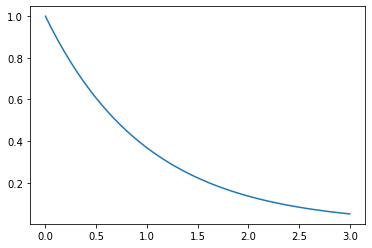

In [29]:
def f(y,t):
    return(-y)  #def funcion
y0=1.0  #arg necesario
t=np.linspace(0,3) #arg necesario
sol=integrate.odeint(f,y0,t) #solución
plt.plot(t,sol) #grafico,vemos que es la exp

In [30]:
help(integrate.odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

Ecuaciones algebraicas no lineales

$$M = E - e sin(e)$$
$$F(E) = E- esin(E) - M$$

In [33]:
from scipy import optimize
def F(E,e,M):
    return E-e*np.sin(E)-M
sol=optimize.root(F,0.1,args=(0.016,0.1))
sol

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([2.8449465e-15])
       r: array([-0.98408255])
  status: 1
 success: True
       x: array([0.10162317])

Interpolación

In [41]:
from scipy import interpolate
# interpolate. #pulsando tabulador aparecen las funciones del paquete
def runge(x):
    return 1/ (1+x**2)
N=11 #nodos de interpolacion
xp=np.arange(11) - 5
fp=runge(xp)
x=np.linspace(-5,5,num=1000)
y=interpolate.barycentric_interpolate(xp,fp,x)

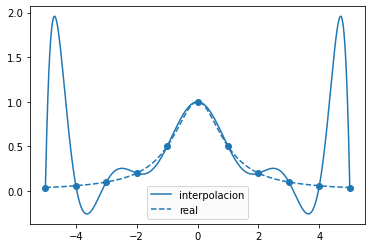

In [42]:
l,=plt.plot(x,y)
plt.plot(x,runge(x),"--",c=l.get_color())
plt.plot(xp,fp,"o",c=l.get_color())
leg=plt.legend(["interpolacion","real"])
leg.get_frame().set_facecolor("#fafafa")

Ajuste de curvas

$$y=Ae^{-Bx^2}+C$$

In [43]:
def func(x, A, B, C):
    """Modelo para nuestros datos."""
    return A * np.exp(-B * x ** 2) + C

In [48]:
Adat, Bdat, Cdat = 2.5, 1.3, 0.5

xdat = np.linspace(-2, 4, 12)
ydat = func(xdat, Adat, Bdat, Cdat) + 0.2 * np.random.normal(size=len(xdat))

(A, B, C), _ = optimize.curve_fit(func, xdat, ydat) #Utiliza los mínimos cuadrados no lineales para ajustar una función, f, a los datos.
print(A, B, C)


2.617565194504684 1.5681795698168675 0.5147428233222231


In [50]:
optimize.curve_fit(func, xdat, ydat)

(array([2.61756519, 1.56817957, 0.51474282]),
 array([[ 0.04691387,  0.02472545, -0.0056837 ],
        [ 0.02472545,  0.10571243,  0.01372467],
        [-0.0056837 ,  0.01372467,  0.00807068]]))

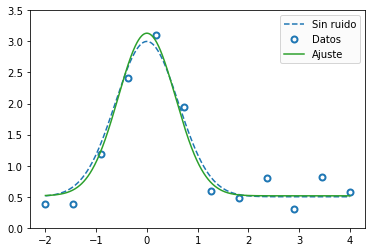

In [51]:
x = np.linspace(-2, 4, 1001)

l, = plt.plot(x, func(x, Adat, Bdat, Cdat), '--', label="Sin ruido")
plt.plot(xdat, ydat, 'o', mew=2, mfc="none", mec=l.get_color(), label="Datos")
plt.plot(x, func(x, A, B, C), label="Ajuste")
plt.ylim(0, 3.5)
leg = plt.legend()
leg.get_frame().set_facecolor('#fafafa')